# Visualize Machine Learning Data in Python With Pandas
http://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

You must understand your data in order to get the best results from machine learning algorithms.

The fastest way to learn more about your data is to use data visualization.

In this post you will discover exactly how you can visualize your machine learning data in Python using Pandas.

Let’s get started.

## About The Recipes

Each recipe in this post is complete and standalone so that you can copy-and-paste it into your own project and use it immediately.

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is used to demonstrate each plot. This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years. As such it is a classification problem.

It is a good dataset for demonstration because all of the input attributes are numeric and the output variable to be predicted is binary (0 or 1).

The data is freely available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html) and is downloaded directly as part of each recipe.

## Univariate Plots

In this section we will look at techniques that you can use to understand each attribute independently.

### Histograms

A fast way to get an idea of the distribution of each attribute is to look at histograms.

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian’, skewed or even has an exponential distribution. It can also help you see possible outliers.

In [1]:
%matplotlib inline

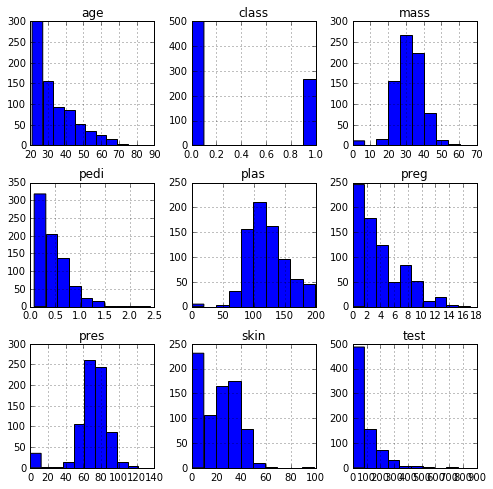

In [7]:
# Univariate Histograms
import matplotlib.pyplot as plt
import pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
data.hist(figsize=(8,8));

We can see that perhaps the attributes age, pedi and test may have an exponential distribution. We can also see that perhaps the mass and pres and plas attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

### Density Plots

Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms.

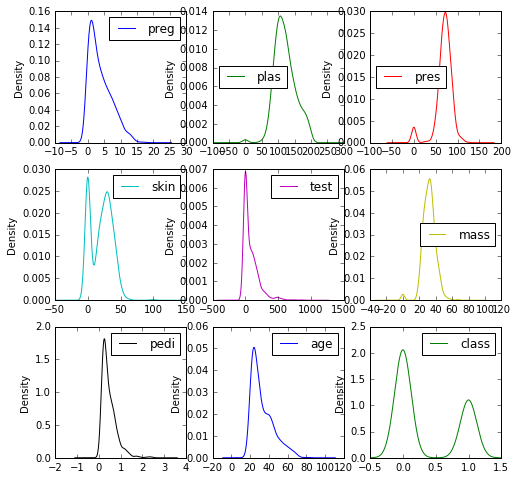

In [9]:
# Univariate Density Plots
import matplotlib.pyplot as plt
import pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(8,8));

### Box and Whisker Plots

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short.

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

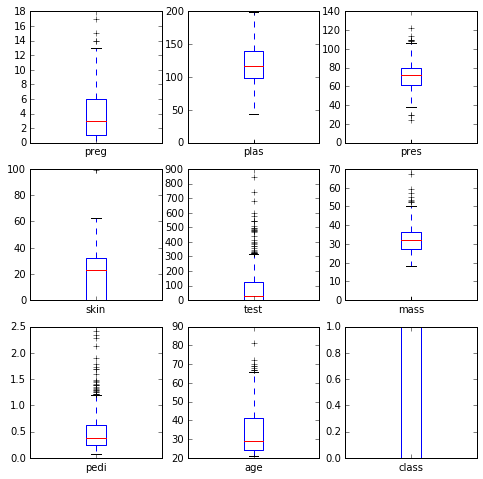

In [10]:
# Box and Whisker Plots
import matplotlib.pyplot as plt
import pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8));

We can see that the spread of attributes is quite different. Some like age, test and skin appear quite skewed towards smaller values.

## Multivariate Plots

This section shows examples of plots with interactions between multiple variables.

### Correlation Matrix Plot

[Correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated.

You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other.

This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

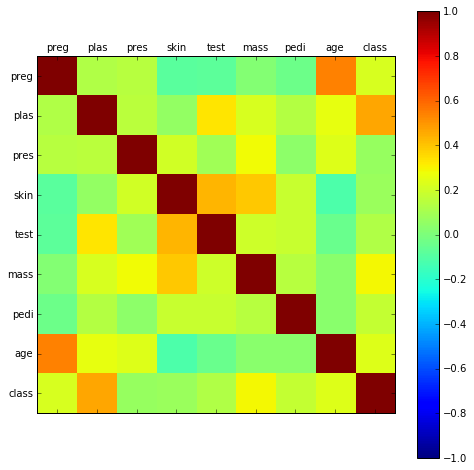

In [15]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names);

We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly positively correlated with each other (as you would expected) in the diagonal line from top left to bottom right.

### Scatterplot Matrix

A scatterplot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatterplot for each pair of attributes in your data. Drawing all these scatterplots together is called a scatterplot matrix.

Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

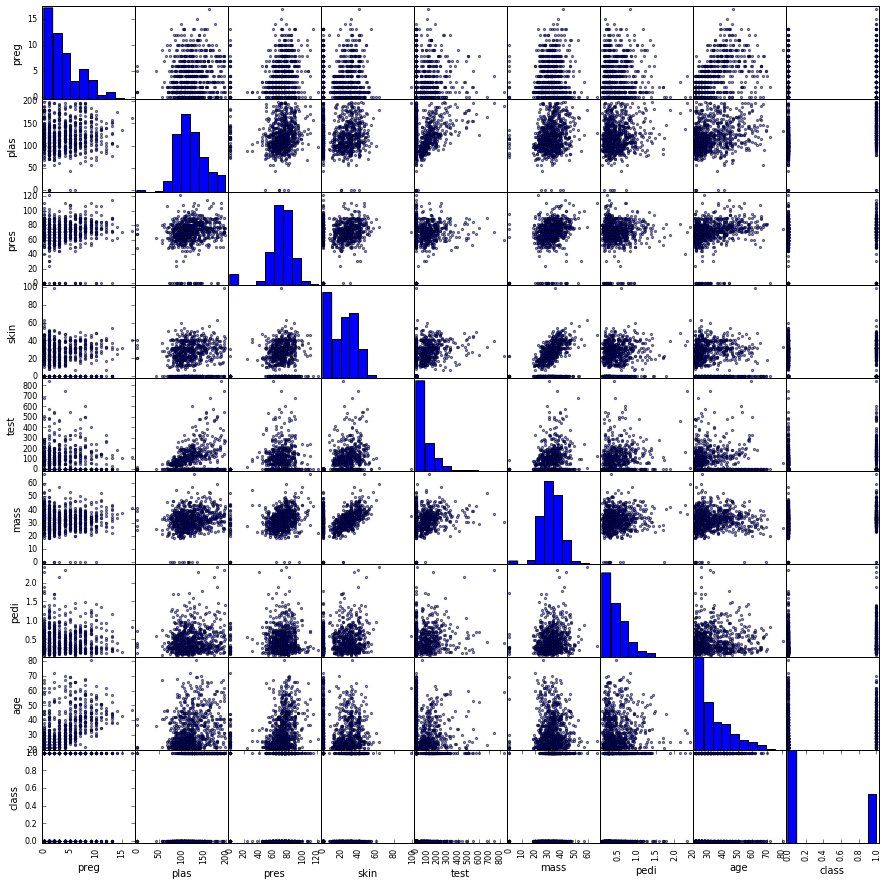

In [18]:
# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas
from pandas.tools.plotting import scatter_matrix
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
scatter_matrix(data, figsize=(15,15));

Like the Correlation Matrix Plot, the scatterplot matrix is symmetrical. This is useful to look at the pair-wise relationships from different perspectives. Because there is little point oi drawing a scatterplot of each variable with itself, the diagonal shows histograms of each attribute.

## Summary

In this post you discovered a number of ways that you can better understand your machine learning data in Python using Pandas.

Specifically, you learned how to plot your data using:

Histograms
Density Plots
Box and Whisker Plots
Correlation Matrix Plot
Scatterplot Matrix